
# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

<center>
<img 
     src="http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg" 
     alt="Drawing" 
     style="width:30%;"
/>
</center>

### Universidad Nacional de Córdoba
---

## Practico
### Aprendizaje Supervisado

El objetivo consiste en explorar la aplicación de diferentes métodos de aprendizaje supervisado aprendidos 
en el curso, a través de experimentos reproducibles, y evaluando a su vez la conveniencia de uno u otro, 
así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

Para este practico se usara el dataset obtenido en el practico anterior
> Dataset Original: [here](https://drive.google.com/file/d/1wCNrWQbUd_bh1mdjZ-dg3g9y0r02JyQN/view?usp=sharing)

## 1. Preparación

* Usar la columna monto movimiento como target para modelos de regresión.
* Con el objetivo de preparar los datos para los modelos de clasificacion.
  Crear una columna que indique si un cliente ha aumentado el monto de movimiento 
  mesual, comparando con el mes anterior. En donde 
  - 1 si el monto ha aumentado respecto del mes anterior (con un incremento mayor o igual al 10%)
  - 0 si no fue asi.
  > consideraciones: el primer mes del dataset, el valor es 0

## 2. División

La primer tarea consiste en dividir el conjunto de datos, en conjuntos de entrenamiento (training), validación (validation).
evaluación (testing) 

<img 
     src="https://i.stack.imgur.com/pXAfX.png" 
     alt="Drawing" 
     style="width:40%;"
/>

* Para entrenamiento y validación utilizar aproximadamente 70-80% de los datos para entrenamiento y 30-20% para validación.
* Para el conjunto de evaluacion se usara uno dado por el mentor

## 3. Regresión

Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos 
de predicción para el `monto_compra_movimiento`, utilizando la librería Scikit-Learn:

* LinearSVR ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR))
* SGDRegressor ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor))
* KNeighborsRegressor ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor))
* GaussianProcessRegressor ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor))
* VotingRegressor ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor))

Y de la libreria XGBoost
* XGBRegressor ([Doc](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor))

De estos tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

Utilizar el método Grid Search, o de búsqueda exahustiva, con cross-validation para profundizar en la búsqueda y selección de hiperparámetros.

Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
* MSE 
* MAE 
* RMSE

Comparar las métricas obtenidas en cada modelo y obtener conclusiones.

> Una vez encontrado el mejor modelo se validara usando el conjunto de evaluacion dado por el mentor

## 4. Clasificación
Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos 
de predicción para la variable que indica si el consumo sera mas alto, o menor en el mes siguiente, utilizando la librería Scikit-Learn:

* RandomForestClassifier ([Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

Y de la libreria XGBoost
* XGBClassifier ([Doc](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier))

Comparar 
* precision
* recall  
* f1-score
* Accuracy

Comparar las métricas obtenidas en cada modelo y obtener conclusiones.

> Una vez encontrado el mejor modelo se validara usando el conjunto de evaluacion dado por el mentor

## 5. Series Temporales (Optativo)
* Hacer un forecasting usando Exponential Smoothing

En el modelo de Exponential Smoothing, las predicciones son promedios pesados de observaciones pasadas, donde los pesos decaen exponencialmente cuando nos movemos al pasado:
$$
\hat{y}_{t + 1} = l_t \\
l_t = \alpha y_t + (1 - \alpha) l_{t - 1}
$$

Donde:

Asumimos que:
* $l_0$ está dado
* 0 $< \alpha <$ 1

El método se suele usar cuando los datos no tienen patrones de tendencia ni estacional claros.


In [1]:
import warnings
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from pandas.plotting import lag_plot

import pyarrow
import fastparquet

import statsmodels

In [2]:
print(statsmodels.__version__)
warnings.filterwarnings('ignore')
%matplotlib inline

0.12.2


In [3]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15, 10)})

Para cargar el dataset

In [4]:
df = pd.read_parquet("cupones_ds.parquet")

In [5]:
df.head(5)

,dni_titular_movimiento,moneda_movimiento,id_comercio_movimiento,nombre_comercio_histo,numero_cupon_movimiento,debito_credito_movimiento,producto_naranja_movimiento,codigo_empresa_movimiento,tipo_producto_tarjeta_movimiento,plan_movimiento,...,sexo_descripcion,pais,provincia,ciudad,domicilio_codigo_postal,domicilio_barrio,fecha_de_ingreso_histo,cargo_descripcion_histo,nivel_estudio_descripcion_histo,rel_vivienda_descripcion_histo
0,0001686b52949b5461ffcbc766687e45031,0,20099784,INTERES POR MORA U$S,200813,0,PL,1,0,1,...,Hombre,Argentina,BUENOS AIRES,LA TABLADA,1766.0,LA TABLADA,2012-12-11,EMP.DE COMERCIO,SECUNDARIOS,Propia
1,000220fa96ec5af89817894033f8099c547,0,20099784,INTERES POR MORA U$S,200813,0,PL,1,0,1,...,Mujer,Argentina,MENDOZA,VA.NVA. DE GUAYMALLEN,5521.0,GLLEN,2020-06-10,SIN DATOS,None,None
2,0002be202de47dfae9cc2304d91161be595,0,20099784,INTERES POR MORA U$S,200813,0,PL,1,0,1,...,Mujer,Argentina,BUENOS AIRES,SANTA TERESITA,7107.0,SANTA TERESITA,2012-09-13,SIN DATOS,PRIMARIOS,Otros
3,000e137d0af42e193be1ff670c00d4d1506,0,20099784,INTERES POR MORA U$S,200813,0,PL,1,0,1,...,Hombre,Argentina,SANTA FE,SAN LORENZO,2200.0,BOUCHARD,2008-01-15,EMP.DE COMERCIO,SECUNDARIOS,Propia
4,0009d010e4faf69552a814a33832b185877,0,20099784,INTERES POR MORA U$S,200813,0,PL,1,0,1,...,Mujer,Argentina,CAPITAL FEDERAL,CIUDAD AUTONOMA DE BUENOS AIRES,1019.0,SAN NICOLAS,2013-06-06,EMP.DE COMERCIO,UNIVERSITARIOS,Alquilada


In [6]:
cols = ['producto_naranja_movimiento', 'monto_compra_movimiento', 'fecha_cupon_movimiento']

In [7]:
df[cols]

,producto_naranja_movimiento,monto_compra_movimiento,fecha_cupon_movimiento
0,PL,6.24,2020-08-25
1,PL,17.73,2020-08-25
2,PL,6.18,2020-08-25
3,PL,2.83,2020-08-25
4,PL,2.38,2020-08-25
...,...,...,...
4092072,PL,2.29,2021-02-03
4092073,PL,229.90,2021-01-25
4092074,PL,4.64,2020-09-02
4092075,PL,12.22,2020-11-02


In [8]:
sf = df[cols][df.producto_naranja_movimiento == 'PL']
sf

,producto_naranja_movimiento,monto_compra_movimiento,fecha_cupon_movimiento
0,PL,6.24,2020-08-25
1,PL,17.73,2020-08-25
2,PL,6.18,2020-08-25
3,PL,2.83,2020-08-25
4,PL,2.38,2020-08-25
...,...,...,...
4092072,PL,2.29,2021-02-03
4092073,PL,229.90,2021-01-25
4092074,PL,4.64,2020-09-02
4092075,PL,12.22,2020-11-02


In [9]:
cols = ['fecha_cupon_movimiento', 'monto_compra_movimiento']
sf = sf[cols].groupby(by=['fecha_cupon_movimiento'], dropna=True).sum()

In [10]:
sf.reset_index(inplace=True)
sf

,fecha_cupon_movimiento,monto_compra_movimiento
0,2020-02-16,71760.00
1,2020-04-01,69055.20
2,2020-05-27,146558.07
3,2020-06-25,-22098.63
4,2020-07-01,-39054.00
...,...,...
289,2021-04-30,-235966.89
290,2021-05-02,-1653081.99
291,2021-05-06,3462.42
292,2021-05-10,90.39


In [11]:
print(sf['fecha_cupon_movimiento'].max())
print(sf['fecha_cupon_movimiento'].min())

2021-05-25
2020-02-16


In [12]:
sf.set_index('fecha_cupon_movimiento', inplace=True)
sf

,monto_compra_movimiento
fecha_cupon_movimiento,
2020-02-16,71760.00
2020-04-01,69055.20
2020-05-27,146558.07
2020-06-25,-22098.63
2020-07-01,-39054.00
...,...
2021-04-30,-235966.89
2021-05-02,-1653081.99
2021-05-06,3462.42


En series temporales se usa Series en lugar de Dataframe

In [13]:
ss = sf['monto_compra_movimiento']
ss

fecha_cupon_movimiento
2020-02-16      71760.00
2020-04-01      69055.20
2020-05-27     146558.07
2020-06-25     -22098.63
2020-07-01     -39054.00
                 ...    
2021-04-30    -235966.89
2021-05-02   -1653081.99
2021-05-06       3462.42
2021-05-10         90.39
2021-05-25     320269.71
Name: monto_compra_movimiento, Length: 294, dtype: float64

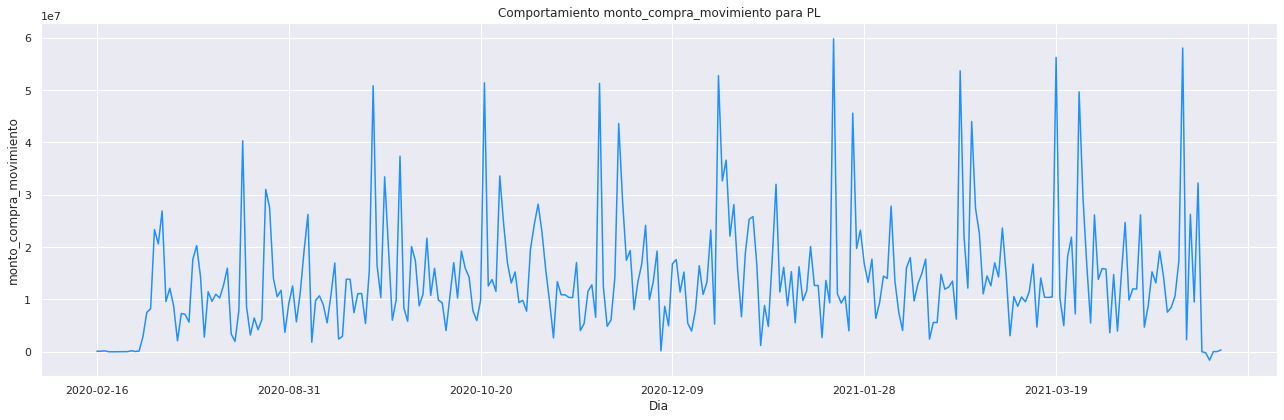

In [14]:
fig = plt.figure(figsize=(18, 6))

ax = plt.subplot(1, 1, 1)
ss.plot(color='dodgerblue')
ax.set_xlabel('Dia')
ax.set_ylabel('monto_compra_movimiento')
ax.set_title('Comportamiento monto_compra_movimiento para PL')

plt.tight_layout()
plt.show()

In [15]:
y_test = sf.monto_compra_movimiento.loc['2021-03-19':]
y_train = sf[~sf.monto_compra_movimiento.isin(y_test)].monto_compra_movimiento


In [16]:
print(y_test.index.max())
print(y_test.index.min())

2021-05-25
2021-03-19


In [17]:
print(y_train.index.max())
print(y_train.index.min())

2021-03-18
2020-02-16


## Seasonal Random Walk (Seasonal Naïve)

#### Descomposicion

Una operación fundamental para entender el comportamiento de una serie de
 tiempo y poder determinar si se trata de una serie `estacionaria` o no

La **descomposición** es una técnica que trata de descomponer una serie de tiempo en su tendencia, su estacionalidad y sus factores residuales

Ejemplo de descomposición de serie de tiempo

<img 
src="https://i.imgur.com/g0PQASf.png" />


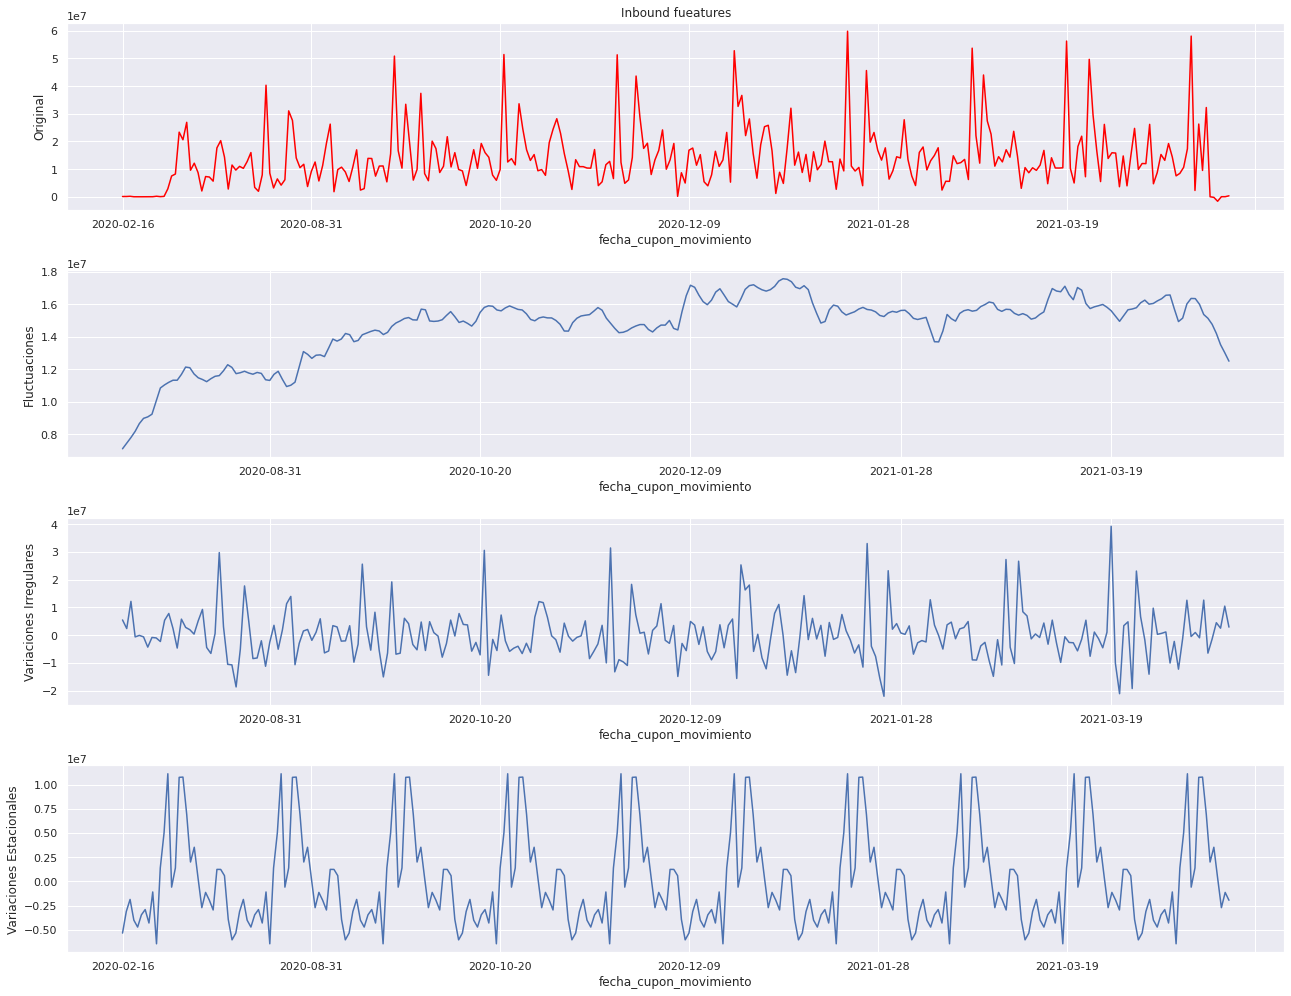

In [18]:
res = sm.tsa.seasonal_decompose(
    sf['monto_compra_movimiento'], model='additive', freq=30
    )

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(18, 14))

ax1.set_title('Inbound fueatures')
sf.monto_compra_movimiento.plot(ax=ax1, color='red')
ax1.set_ylabel('Original')

res.trend.plot(ax=ax2)
ax2.set_ylabel('Fluctuaciones')

res.resid.plot(ax=ax3)
ax3.set_ylabel('Variaciones Irregulares')

res.seasonal.plot(ax=ax4)
ax4.set_ylabel('Variaciones Estacionales')
plt.tight_layout()
plt.show()

## Forecast

In [19]:
model = ARIMA(
    endog=y_train, exog=None, order=(0, 0, 1), seasonal_order=(0, 1, 0, 42)
    ).fit()
    

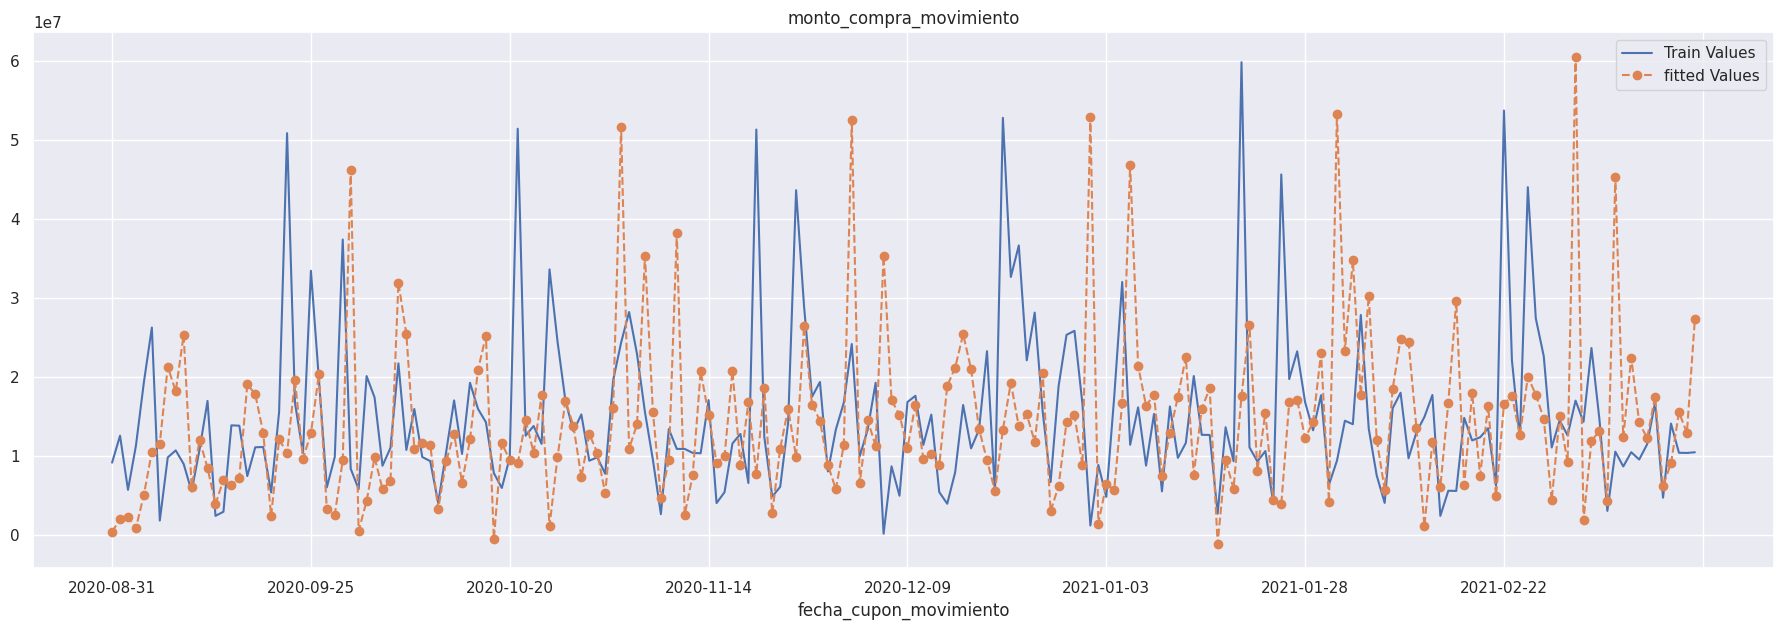

In [20]:
fig = plt.figure(figsize=(18, 12), dpi=100)

ax = plt.subplot(2, 1, 1)
y_train.tail(200).plot(ax=ax, label='Train Values', linestyle='-')
model.fittedvalues.tail(200).plot(
    ax=ax, label='fitted Values', marker='o', linestyle='--')
ax.set_title('monto_compra_movimiento')
ax.legend()

plt.tight_layout()
plt.show()

In [21]:
# Forecast
# 95% conf se, conf
fc = model.forecast(steps=len(y_test), exog=y_test, alpha=0.05) 
#Make as pandas series
fc_in = fc.reset_index(drop=True)
fc_in.index = y_test.index

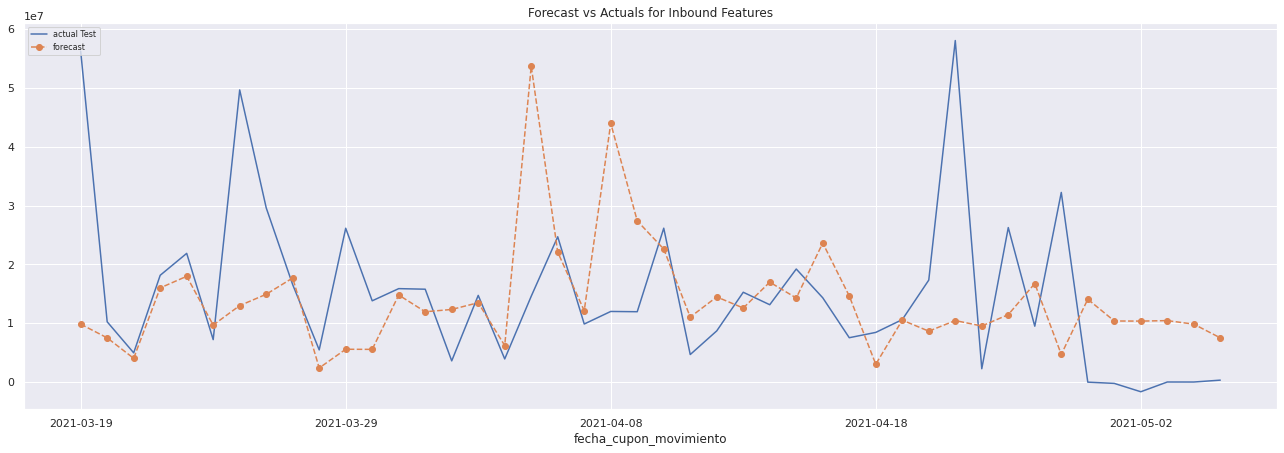

In [22]:
fig = plt.figure(figsize=(18, 12))

ax = plt.subplot(2, 1, 1)
y_test.plot(ax=ax, label='actual Test')
fc_in.plot(ax=ax, label='forecast', marker='o', linestyle='--')
ax.set_title('Forecast vs Actuals for Inbound Features')
ax.legend(loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

In [23]:
table = pd.DataFrame(
    [(sm.tools.eval_measures.rmse(y_test, fc_in), 
      (y_test - fc_in).sem())],
      columns=['RMSE','SE']
      )
table.round(3)

,RMSE,SE
0,1.623687e+07,2470284.646
